Load and Preprocess Dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define ImageDataGenerator for both train and val (without validation_split)
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)

# ✅ Load training images
train_generator = datagen.flow_from_directory(
    r"E:\vscode\project5\data\train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# ✅ Load validation images
val_generator = datagen.flow_from_directory(
    r"E:\vscode\project5\data\val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

CNN  Model Training Code

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Build the CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
checkpoint = ModelCheckpoint(
    filepath='models/fish_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, earlystop, lr_scheduler]
)

e:\vscode\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
e:\vscode\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step - accuracy: 0.2688 - loss: 2.0581
Epoch 1: val_accuracy improved from -inf to 0.51099, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 191s 970ms/step - accuracy: 0.2693 - loss: 2.0568 - val_accuracy: 0.5110 - val_loss: 1.4484 - learning_rate: 1.0000e-04
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 871ms/step - accuracy: 0.5321 - loss: 1.3780
Epoch 2: val_accuracy improved from 0.51099 to 0.63278, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 185s 946ms/step - accuracy: 0.5322 - loss: 1.3777 - val_accuracy: 0.6328 - val_loss: 1.1205 - learning_rate: 1.0000e-04
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.6006 - loss: 1.1923
Epoch 3: val_accuracy improved from 0.63278 to 0.67491, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 177s 906ms/step - accuracy: 0.6007 - loss: 1.1919 - val_accuracy: 0.6749 - val_loss: 0.9974 - learning_rate: 1.0000e-04
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.6534 - loss: 0.9983
Epoch 4: val_accuracy improved from 0.67491 to 0.80037, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 176s 903ms/step - accuracy: 0.6535 - loss: 0.9982 - val_accuracy: 0.8004 - val_loss: 0.7860 - learning_rate: 1.0000e-04
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.7032 - loss: 0.8917
Epoch 5: val_accuracy did not improve from 0.80037
195/195 ━━━━━━━━━━━━━━━━━━━━ 172s 880ms/step - accuracy: 0.7033 - loss: 0.8915 - val_accuracy: 0.7592 - val_loss: 0.7213 - learning_rate: 1.0000e-04
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.7313 - loss: 0.8140
Epoch 6: val_accuracy did not improve from 0.80037
195/195 ━━━━━━━━━━━━━━━━━━━━ 173s 887ms/step - accuracy: 0.7313 - loss: 0.8140 - val_accuracy: 0.7848 - val_loss: 0.6886 - learning_rate: 1.0000e-04
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.7585 - loss: 0.7320
Epoch 7: val_accuracy improved from 0.80037 to 0.84066, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 172s 880ms/step - accuracy: 0.7585 - loss: 0.7319 - val_accuracy: 0.8407 - val_loss: 0.5478 - learning_rate: 1.0000e-04
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.7826 - loss: 0.6592
Epoch 8: val_accuracy did not improve from 0.84066
195/195 ━━━━━━━━━━━━━━━━━━━━ 179s 915ms/step - accuracy: 0.7826 - loss: 0.6592 - val_accuracy: 0.8333 - val_loss: 0.5581 - learning_rate: 1.0000e-04
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 814ms/step - accuracy: 0.8032 - loss: 0.6153
Epoch 9: val_accuracy improved from 0.84066 to 0.86264, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 172s 883ms/step - accuracy: 0.8032 - loss: 0.6153 - val_accuracy: 0.8626 - val_loss: 0.4855 - learning_rate: 1.0000e-04
Epoch 10/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.8177 - loss: 0.5704
Epoch 10: val_accuracy improved from 0.86264 to 0.87363, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 148s 757ms/step - accuracy: 0.8176 - loss: 0.5705 - val_accuracy: 0.8736 - val_loss: 0.4521 - learning_rate: 1.0000e-04
Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.8417 - loss: 0.4937
Epoch 11: val_accuracy improved from 0.87363 to 0.90659, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 176s 900ms/step - accuracy: 0.8416 - loss: 0.4938 - val_accuracy: 0.9066 - val_loss: 0.3857 - learning_rate: 1.0000e-04
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.8377 - loss: 0.5218
Epoch 12: val_accuracy did not improve from 0.90659
195/195 ━━━━━━━━━━━━━━━━━━━━ 173s 883ms/step - accuracy: 0.8377 - loss: 0.5217 - val_accuracy: 0.9038 - val_loss: 0.3612 - learning_rate: 1.0000e-04
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.8336 - loss: 0.4951
Epoch 13: val_accuracy improved from 0.90659 to 0.91300, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 931ms/step - accuracy: 0.8337 - loss: 0.4950 - val_accuracy: 0.9130 - val_loss: 0.3160 - learning_rate: 1.0000e-04
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 879ms/step - accuracy: 0.8573 - loss: 0.4326
Epoch 14: val_accuracy did not improve from 0.91300
195/195 ━━━━━━━━━━━━━━━━━━━━ 187s 957ms/step - accuracy: 0.8573 - loss: 0.4326 - val_accuracy: 0.9048 - val_loss: 0.3316 - learning_rate: 1.0000e-04
Epoch 15/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.8715 - loss: 0.3981
Epoch 15: val_accuracy did not improve from 0.91300
195/195 ━━━━━━━━━━━━━━━━━━━━ 169s 865ms/step - accuracy: 0.8715 - loss: 0.3981 - val_accuracy: 0.9011 - val_loss: 0.2981 - learning_rate: 1.0000e-04
Epoch 16/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.8664 - loss: 0.4024
Epoch 16: val_accuracy improved from 0.91300 to 0.94322, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 180s 921ms/step - accuracy: 0.8665 - loss: 0.4024 - val_accuracy: 0.9432 - val_loss: 0.2576 - learning_rate: 1.0000e-04
Epoch 17/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.8810 - loss: 0.3522
Epoch 17: val_accuracy did not improve from 0.94322
195/195 ━━━━━━━━━━━━━━━━━━━━ 162s 826ms/step - accuracy: 0.8809 - loss: 0.3523 - val_accuracy: 0.9286 - val_loss: 0.2528 - learning_rate: 1.0000e-04
Epoch 18/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.8827 - loss: 0.3563
Epoch 18: val_accuracy did not improve from 0.94322
195/195 ━━━━━━━━━━━━━━━━━━━━ 167s 855ms/step - accuracy: 0.8826 - loss: 0.3563 - val_accuracy: 0.9386 - val_loss: 0.2381 - learning_rate: 1.0000e-04
Epoch 19/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 814ms/step - accuracy: 0.8828 - loss: 0.3461
Epoch 19: val_accuracy improved from 0.94322 to 0.94689, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 173s 889ms/step - accuracy: 0.8829 - loss: 0.3461 - val_accuracy: 0.9469 - val_loss: 0.2160 - learning_rate: 1.0000e-04
Epoch 20/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.8940 - loss: 0.3213
Epoch 20: val_accuracy improved from 0.94689 to 0.95055, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 164s 838ms/step - accuracy: 0.8940 - loss: 0.3212 - val_accuracy: 0.9505 - val_loss: 0.2202 - learning_rate: 1.0000e-04


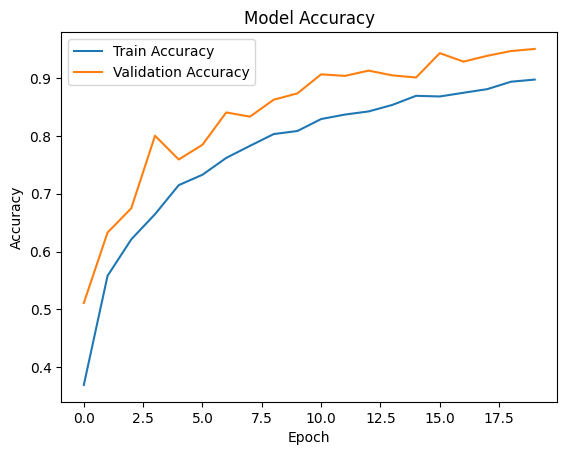

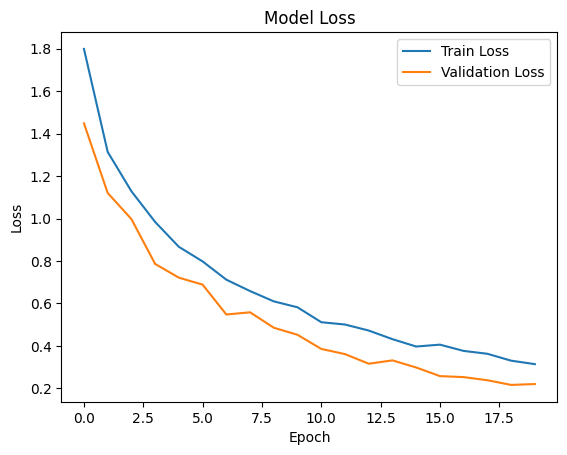

In [17]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


Train 5 Pre-trained Models (Transfer Learning)

VGG 16

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load VGG16 base model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the final model
vgg_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
vgg_model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Save the best model
checkpoint = ModelCheckpoint(
    filepath='models/vgg16_fish.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_vgg = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1434 - loss: 2.4476
Epoch 1: val_accuracy improved from -inf to 0.25916, saving model to models/vgg16_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 686s 4s/step - accuracy: 0.1435 - loss: 2.4471 - val_accuracy: 0.2592 - val_loss: 2.1276
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2702 - loss: 2.1203
Epoch 2: val_accuracy improved from 0.25916 to 0.38828, saving model to models/vgg16_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 615s 3s/step - accuracy: 0.2703 - loss: 2.1201 - val_accuracy: 0.3883 - val_loss: 1.9693
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3295 - loss: 1.9593
Epoch 3: val_accuracy improved from 0.38828 to 0.56319, saving model to models/vgg16_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 551s 3s/step - accuracy: 0.3295 - loss: 1.9591 - val_accuracy: 0.5632 - val_loss: 1.8278
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4018 - loss: 1.8265
Epoch 4: val_accuracy improved from 0.56319 to 0.59066, saving model to models/vgg16_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 556s 3s/step - accuracy: 0.4019 - loss: 1.8263 - val_accuracy: 0.5907 - val_loss: 1.7229
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4604 - loss: 1.7195
Epoch 5: val_accuracy improved from 0.59066 to 0.60714, saving model to models/vgg16_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 644s 3s/step - accuracy: 0.4604 - loss: 1.7193 - val_accuracy: 0.6071 - val_loss: 1.6243


MobileNetV2

In [19]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load MobileNetV2 base model
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build model
mobilenet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
mobilenet_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Save best model
checkpoint = ModelCheckpoint(
    filepath='models/mobilenetv2_fish.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model
history_mobilenet = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,  # ✅ Same approach as VGG16
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.3033 - loss: 2.1439
Epoch 1: val_accuracy improved from -inf to 0.85897, saving model to models/mobilenetv2_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 150s 739ms/step - accuracy: 0.3042 - loss: 2.1413 - val_accuracy: 0.8590 - val_loss: 0.7921
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.7289 - loss: 0.8724
Epoch 2: val_accuracy improved from 0.85897 to 0.92674, saving model to models/mobilenetv2_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 174s 894ms/step - accuracy: 0.7291 - loss: 0.8719 - val_accuracy: 0.9267 - val_loss: 0.4305
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 726ms/step - accuracy: 0.8238 - loss: 0.5679
Epoch 3: val_accuracy improved from 0.92674 to 0.93681, saving model to models/mobilenetv2_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 165s 846ms/step - accuracy: 0.8239 - loss: 0.5677 - val_accuracy: 0.9368 - val_loss: 0.3071
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - accuracy: 0.8764 - loss: 0.4284
Epoch 4: val_accuracy improved from 0.93681 to 0.95238, saving model to models/mobilenetv2_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 144s 741ms/step - accuracy: 0.8764 - loss: 0.4283 - val_accuracy: 0.9524 - val_loss: 0.2373
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.9056 - loss: 0.3274
Epoch 5: val_accuracy did not improve from 0.95238
195/195 ━━━━━━━━━━━━━━━━━━━━ 132s 674ms/step - accuracy: 0.9056 - loss: 0.3274 - val_accuracy: 0.9460 - val_loss: 0.2135


EfficientNetB0

In [20]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load EfficientNetB0 base model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Final model
efficient_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
efficient_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Save best model
checkpoint = ModelCheckpoint(
    filepath='models/efficientnetb0_fish.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_efficientnet = efficient_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.1378 - loss: 2.3810
Epoch 1: val_accuracy improved from -inf to 0.17125, saving model to models/efficientnetb0_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 156s 759ms/step - accuracy: 0.1379 - loss: 2.3808 - val_accuracy: 0.1712 - val_loss: 2.3178
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.1518 - loss: 2.3345
Epoch 2: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 146s 748ms/step - accuracy: 0.1519 - loss: 2.3345 - val_accuracy: 0.1712 - val_loss: 2.3200
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.1524 - loss: 2.3400
Epoch 3: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 145s 742ms/step - accuracy: 0.1524 - loss: 2.3399 - val_accuracy: 0.1712 - val_loss: 2.3179
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.1703 - loss: 2.3232
Epoch 4: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 145s 745ms/step - accuracy: 0.1703 - loss: 2.3232 - val_accuracy: 0.1712 - val_loss: 2.3157
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.1725 - loss: 2.3294
Epoch 5: val_ac

ResNet50

In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load ResNet50 base model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build model
resnet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
resnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Save best checkpoint
checkpoint = ModelCheckpoint(
    filepath='models/resnet50_fish.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1173 - loss: 2.5626
Epoch 1: val_accuracy improved from -inf to 0.17125, saving model to models/resnet50_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.1174 - loss: 2.5619 - val_accuracy: 0.1712 - val_loss: 2.2901
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1639 - loss: 2.3058
Epoch 2: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.1639 - loss: 2.3058 - val_accuracy: 0.1712 - val_loss: 2.2759
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1897 - loss: 2.2786
Epoch 3: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.1896 - loss: 2.2786 - val_accuracy: 0.1694 - val_loss: 2.2643
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1800 - loss: 2.2688
Epoch 4: val_accuracy improved from 0.17125 to 0.17216, saving model to models/resnet50_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.1800 - loss: 2.2688 - val_accuracy: 0.1722 - val_loss: 2.2372
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1897 - loss: 2.2403
Epoch 5: val_accuracy improved from 0.17216 to 0.17399, saving model to models/resnet50_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.1897 - loss: 2.2403 - val_accuracy: 0.1740 - val_loss: 2.2198


InceptionV3

In [22]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load InceptionV3 base model
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Final model
inception_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
inception_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Save best checkpoint
checkpoint = ModelCheckpoint(
    filepath='models/inceptionv3_fish.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_inception = inception_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 896ms/step - accuracy: 0.3130 - loss: 2.1147
Epoch 1: val_accuracy improved from -inf to 0.81502, saving model to models/inceptionv3_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.3138 - loss: 2.1122 - val_accuracy: 0.8150 - val_loss: 0.7771
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.7079 - loss: 0.9069
Epoch 2: val_accuracy improved from 0.81502 to 0.88645, saving model to models/inceptionv3_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 191s 980ms/step - accuracy: 0.7080 - loss: 0.9064 - val_accuracy: 0.8864 - val_loss: 0.4819
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.8010 - loss: 0.6360
Epoch 3: val_accuracy improved from 0.88645 to 0.88736, saving model to models/inceptionv3_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.8010 - loss: 0.6358 - val_accuracy: 0.8874 - val_loss: 0.3891
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 930ms/step - accuracy: 0.8359 - loss: 0.5146
Epoch 4: val_accuracy improved from 0.88736 to 0.90568, saving model to models/inceptionv3_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.8359 - loss: 0.5145 - val_accuracy: 0.9057 - val_loss: 0.3328
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step - accuracy: 0.8580 - loss: 0.4494
Epoch 5: val_accuracy improved from 0.90568 to 0.92033, saving model to models/inceptionv3_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.8580 - loss: 0.4493 - val_accuracy: 0.9203 - val_loss: 0.2886


Compare & Select Best Model
📊 Print Validation Accuracies

In [23]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model_path, val_generator):
    print(f"\n📦 Evaluation Report for {model_path}")

    # Load model
    model = load_model(model_path)

    # Predict
    Y_pred = model.predict(val_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = val_generator.classes
    class_labels = list(val_generator.class_indices.keys())

    # Classification Report
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(f'Confusion Matrix: {model_path}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



📦 Evaluation Report for models/vgg16_fish.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step
                                  precision    recall  f1-score   support

                     animal fish       0.68      0.98      0.80       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.71      0.73      0.72       105
   fish sea_food gilt_head_bream       0.46      0.18      0.26        94
   fish sea_food hourse_mackerel       0.61      0.67      0.64        97
        fish sea_food red_mullet       0.55      0.58      0.56        90
     fish sea_food red_sea_bream       0.61      0.72      0.66       113
          fish sea_food sea_bass       0.79      0.39      0.52        97
            fish sea_food shrimp       0.60      0.75      0.67       100
fish sea_food striped_red_mullet       0.41      0.19      0.26       101
             fish sea_food trout       0.64      0.81      0.71        98

                        accuracy                           0.63      1

e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


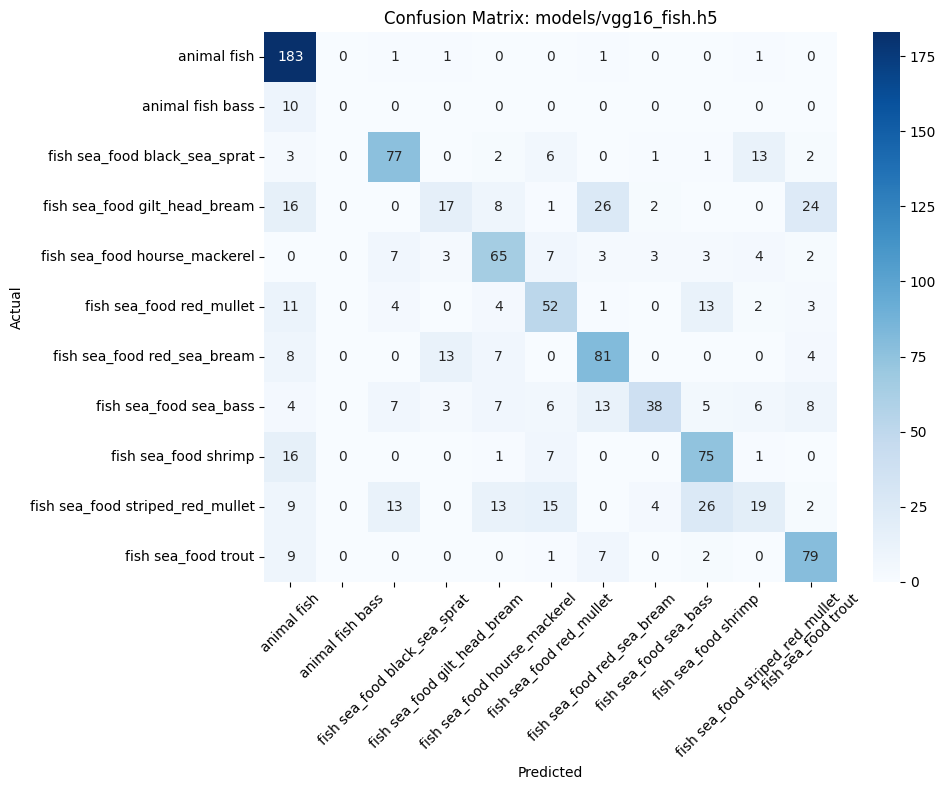


📦 Evaluation Report for models/mobilenetv2_fish.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 763ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.94      0.96      0.95       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.96      0.96      0.96       105
   fish sea_food gilt_head_bream       0.95      0.96      0.95        94
   fish sea_food hourse_mackerel       0.95      0.97      0.96        97
        fish sea_food red_mullet       0.95      0.92      0.94        90
     fish sea_food red_sea_bream       1.00      0.96      0.98       113
          fish sea_food sea_bass       0.94      0.96      0.95        97
            fish sea_food shrimp       0.97      1.00      0.99       100
fish sea_food striped_red_mullet       0.89      0.91      0.90       101
             fish sea_food trout       0.96      0.99      0.97        98

                        accuracy                           0.95     

e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


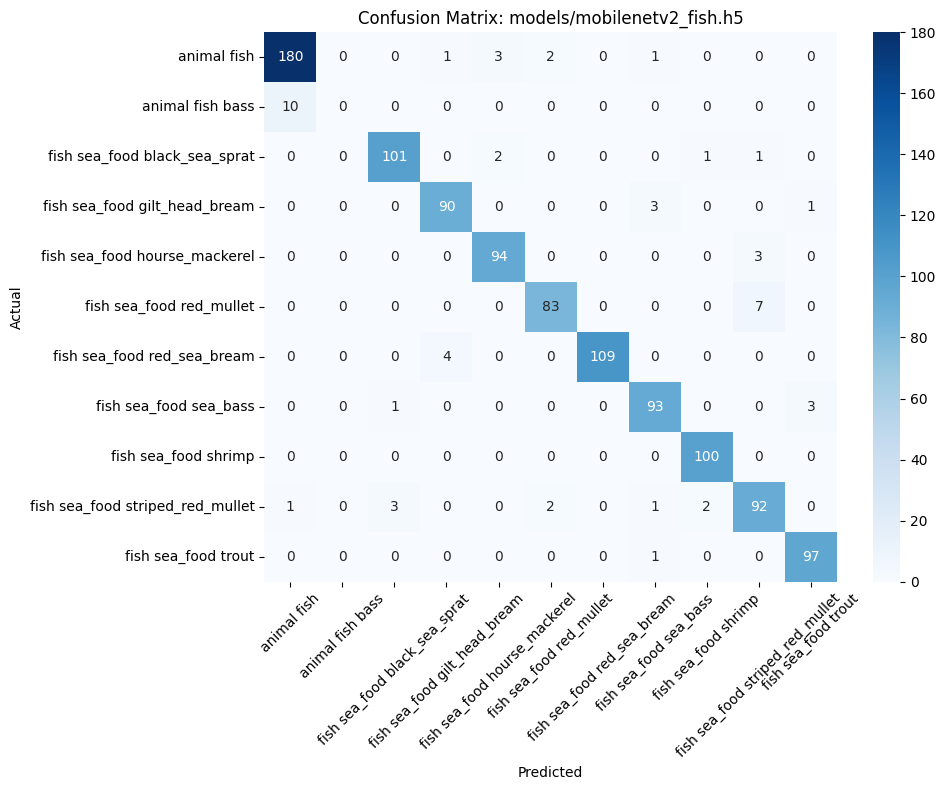


📦 Evaluation Report for models/efficientnetb0_fish.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 859ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accuracy                           0.17     

e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


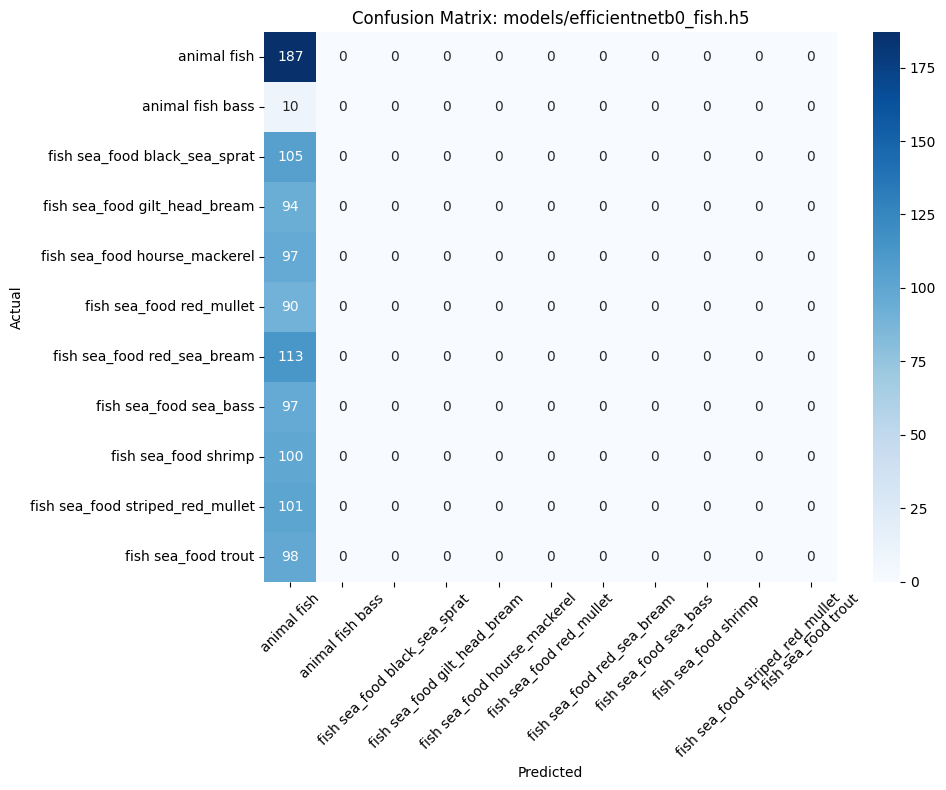


📦 Evaluation Report for models/resnet50_fish.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.30       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.12      0.02      0.03        98

                        accuracy                           0.17      10

e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


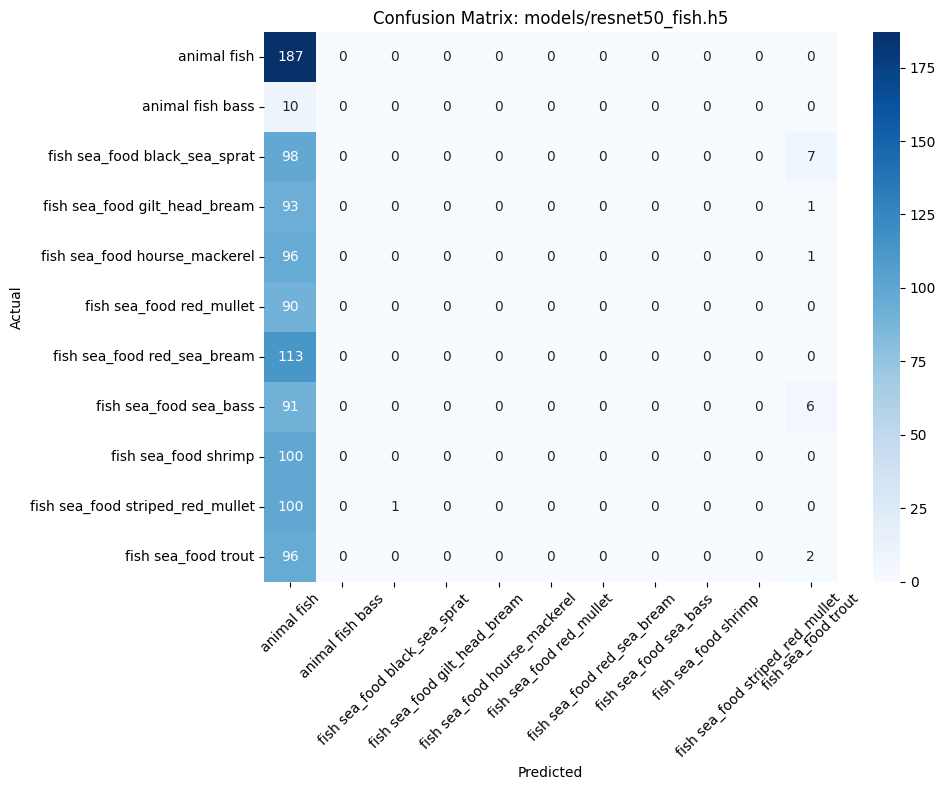


📦 Evaluation Report for models/inceptionv3_fish.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 915ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.93      0.99      0.96       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.93      0.96      0.94       105
   fish sea_food gilt_head_bream       0.78      0.97      0.86        94
   fish sea_food hourse_mackerel       0.90      0.95      0.92        97
        fish sea_food red_mullet       0.89      0.88      0.88        90
     fish sea_food red_sea_bream       0.99      0.88      0.93       113
          fish sea_food sea_bass       0.99      0.84      0.91        97
            fish sea_food shrimp       1.00      0.98      0.99       100
fish sea_food striped_red_mullet       0.86      0.84      0.85       101
             fish sea_food trout       0.96      0.94      0.95        98

                        accuracy                           0.92     

e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


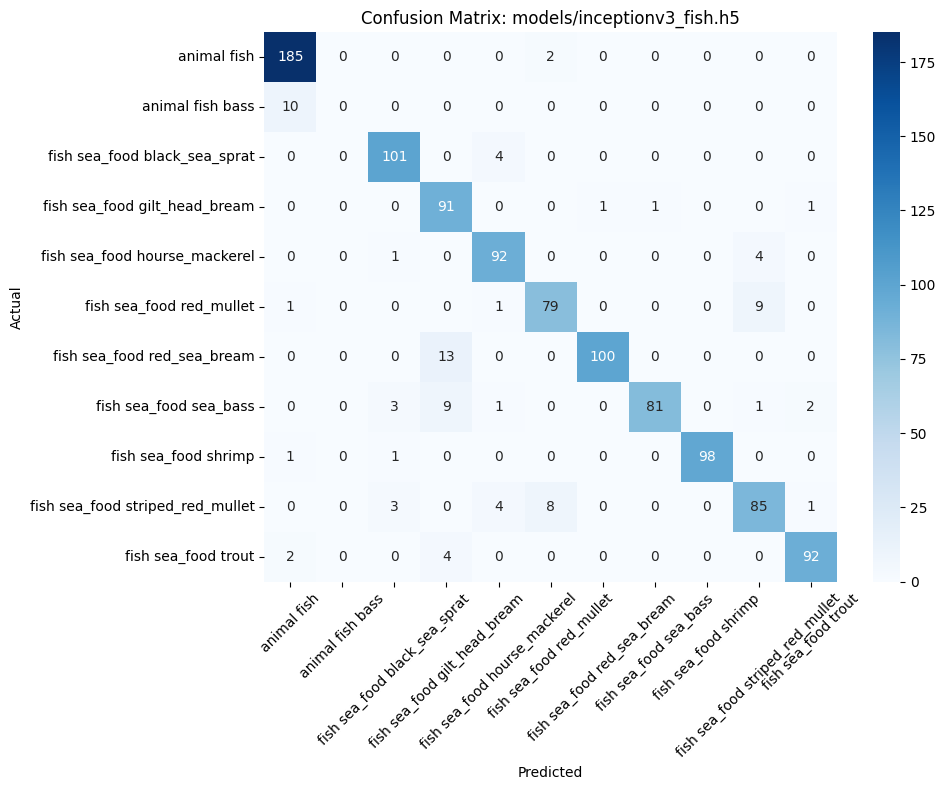

In [25]:
evaluate_model("models/vgg16_fish.h5", val_generator)
evaluate_model("models/mobilenetv2_fish.h5", val_generator)
evaluate_model("models/efficientnetb0_fish.h5", val_generator)
evaluate_model("models/resnet50_fish.h5", val_generator)
evaluate_model("models/inceptionv3_fish.h5", val_generator)

Fine-tuned model

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# 1. Load your best pretrained model
model = load_model('models/mobilenetv2_fish.h5')

# 2. Unfreeze some top layers of base model
model.trainable = True
for layer in model.layers[:-30]:  # Freeze all except the last ~30 layers
    layer.trainable = False

# 3. Re-compile with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Smaller LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Setup callbacks
checkpoint = ModelCheckpoint(
    filepath='models/mobilenetv2_fish_finetuned.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 5. Train the fine-tuned model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint, lr_scheduler, earlystop]
)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.9072 - loss: 0.3411
Epoch 1: val_accuracy improved from -inf to 0.94780, saving model to models/mobilenetv2_fish_finetuned.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 158s 788ms/step - accuracy: 0.9072 - loss: 0.3411 - val_accuracy: 0.9478 - val_loss: 0.2458 - learning_rate: 1.0000e-05
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.9060 - loss: 0.3361
Epoch 2: val_accuracy did not improve from 0.94780
195/195 ━━━━━━━━━━━━━━━━━━━━ 153s 784ms/step - accuracy: 0.9060 - loss: 0.3361 - val_accuracy: 0.9451 - val_loss: 0.2308 - learning_rate: 1.0000e-05
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - accuracy: 0.9049 - loss: 0.3290
Epoch 3: val_accuracy improved from 0.94780 to 0.95971, saving model to models/mobilenetv2_fish_finetuned.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 162s 832ms/step - accuracy: 0.9049 - loss: 0.3289 - val_accuracy: 0.9597 - val_loss: 0.2159 - learning_rate: 1.0000e-05
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 759ms/step - accuracy: 0.9099 - loss: 0.3180
Epoch 4: val_accuracy improved from 0.95971 to 0.96062, saving model to models/mobilenetv2_fish_finetuned.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 172s 882ms/step - accuracy: 0.9099 - loss: 0.3180 - val_accuracy: 0.9606 - val_loss: 0.2188 - learning_rate: 1.0000e-05
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.9176 - loss: 0.3055
Epoch 5: val_accuracy improved from 0.96062 to 0.96612, saving model to models/mobilenetv2_fish_finetuned.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 135s 691ms/step - accuracy: 0.9176 - loss: 0.3055 - val_accuracy: 0.9661 - val_loss: 0.2067 - learning_rate: 1.0000e-05
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9091 - loss: 0.3127
Epoch 6: val_accuracy did not improve from 0.96612
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 687ms/step - accuracy: 0.9091 - loss: 0.3127 - val_accuracy: 0.9533 - val_loss: 0.2149 - learning_rate: 1.0000e-05
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.9193 - loss: 0.2957
Epoch 7: val_accuracy did not improve from 0.96612
195/195 ━━━━━━━━━━━━━━━━━━━━ 139s 715ms/step - accuracy: 0.9193 - loss: 0.2957 - val_accuracy: 0.9570 - val_loss: 0.1995 - learning_rate: 1.0000e-05
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.9207 - loss: 0.2928
Epoch 8: val_accuracy did not improve from 0.96612
195/195 ━━━━━━━━━━━━━━━━━━━━ 138s 708ms/step - accuracy: 0.9207 - loss: 0.2928 - val_accuracy: 0.9533 - val_loss: 0.1951 - learning_rate


📦 Evaluation Report for models/mobilenetv2_fish_finetuned.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 603ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.94      0.96      0.95       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.94      0.97      0.96       105
   fish sea_food gilt_head_bream       0.91      0.96      0.93        94
   fish sea_food hourse_mackerel       0.94      0.98      0.96        97
        fish sea_food red_mullet       0.94      1.00      0.97        90
     fish sea_food red_sea_bream       0.98      0.96      0.97       113
          fish sea_food sea_bass       0.96      0.91      0.93        97
            fish sea_food shrimp       1.00      0.99      0.99       100
fish sea_food striped_red_mullet       0.99      0.95      0.97       101
             fish sea_food trout       0.95      0.95      0.95        98

                        accuracy                           0.95     

e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\vscode\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


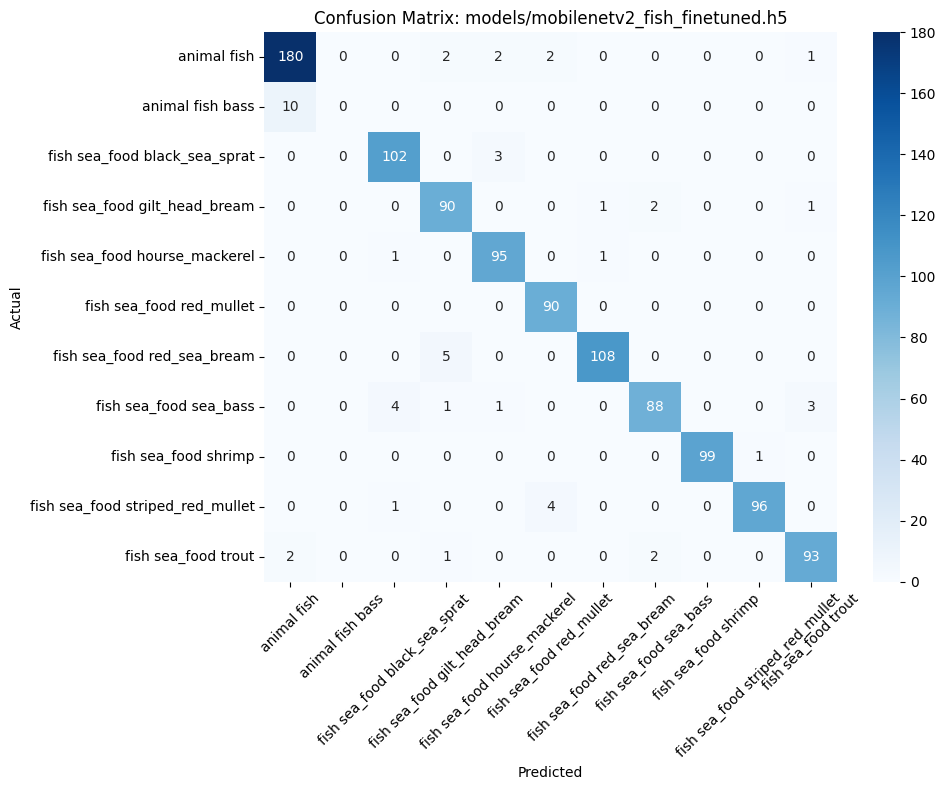

In [27]:
evaluate_model("models/mobilenetv2_fish_finetuned.h5", val_generator)

In [28]:
import shutil
shutil.copy("models/mobilenetv2_fish_finetuned.h5", "models/best_model.h5")

'models/best_model.h5'

In [29]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

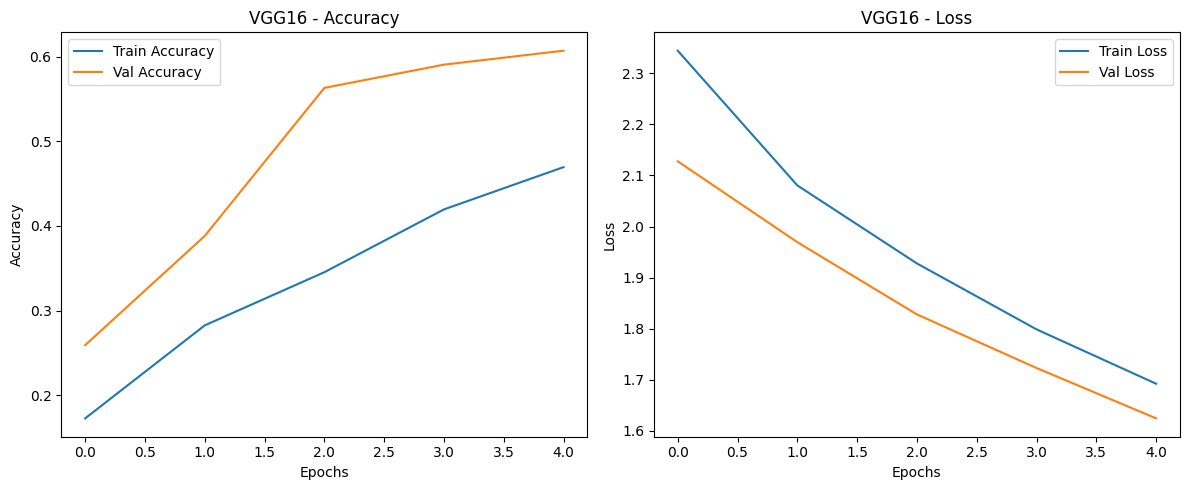

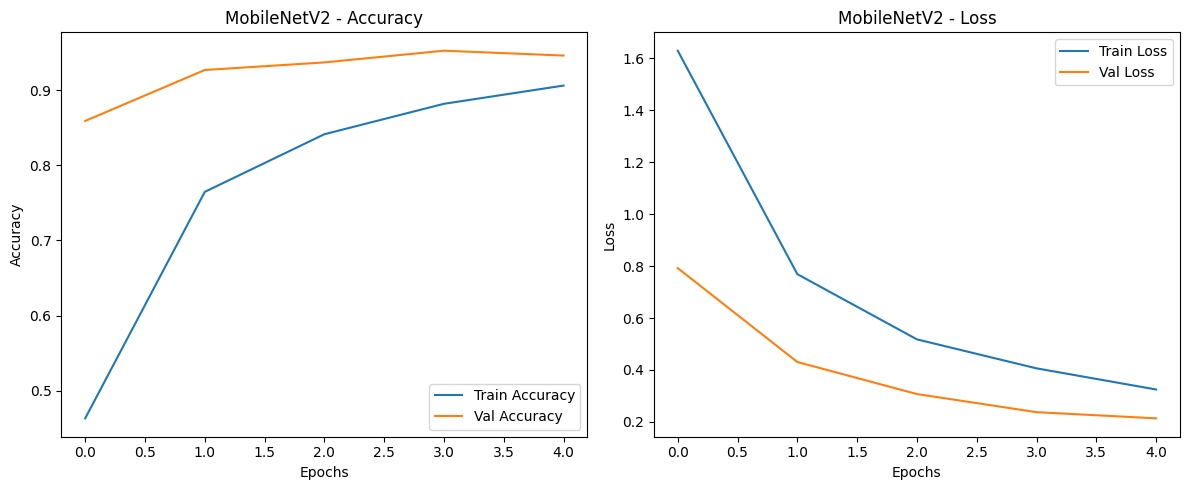

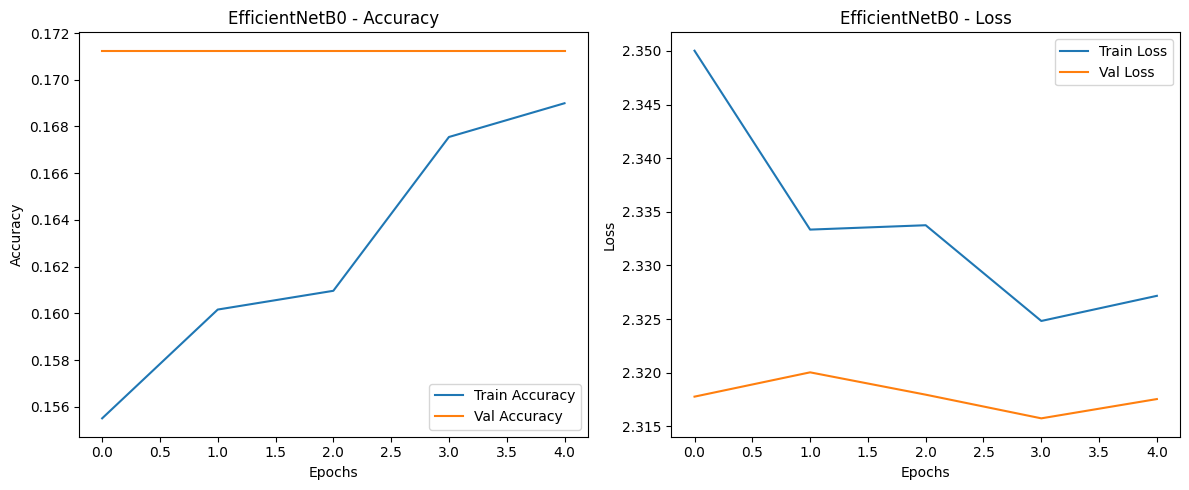

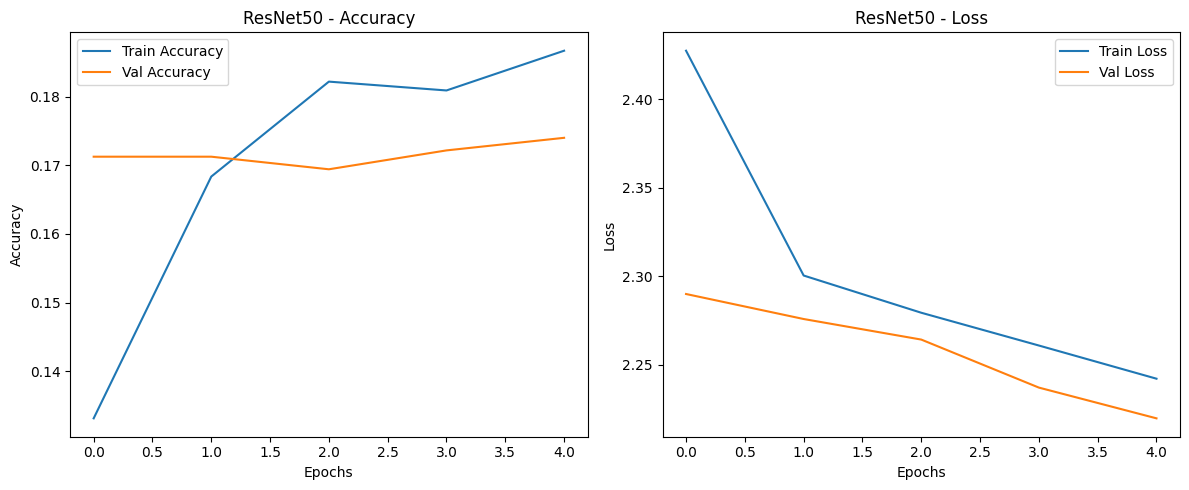

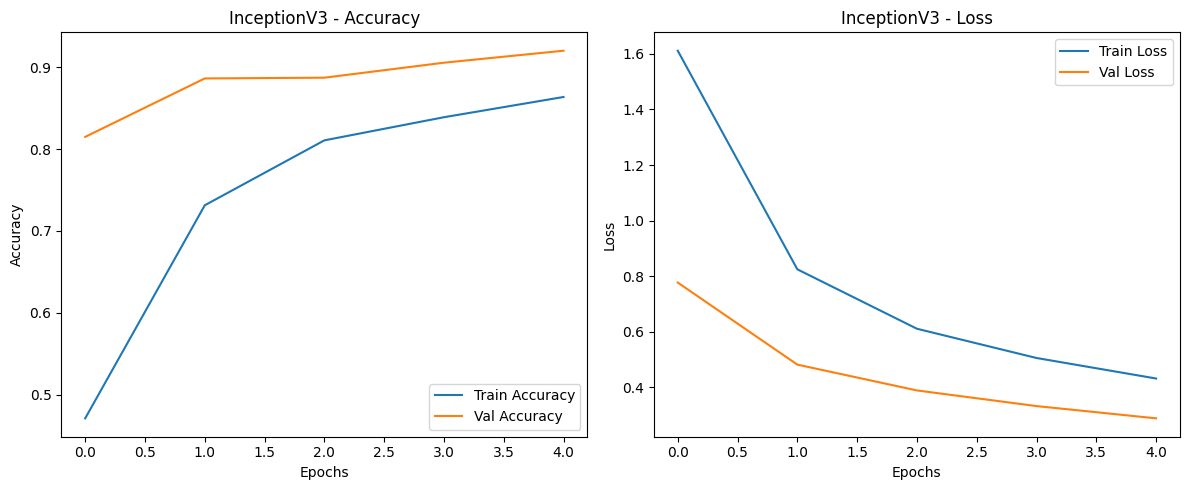

In [30]:
plot_training_history(history_vgg, "VGG16")
plot_training_history(history_mobilenet, "MobileNetV2")
plot_training_history(history_efficientnet, "EfficientNetB0")
plot_training_history(history_resnet, "ResNet50")
plot_training_history(history_inception, "InceptionV3") 